In [31]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline

In [32]:
file_path = r'C:\Users\jaich\OneDrive\Desktop\DS\churn_prediction\churn.csv'
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df.drop('customerID', axis = 'columns', inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
df[pd.to_numeric(df.TotalCharges,errors= 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [35]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [36]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\jaich\AppData\Local\Temp\ipykernel_7508\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


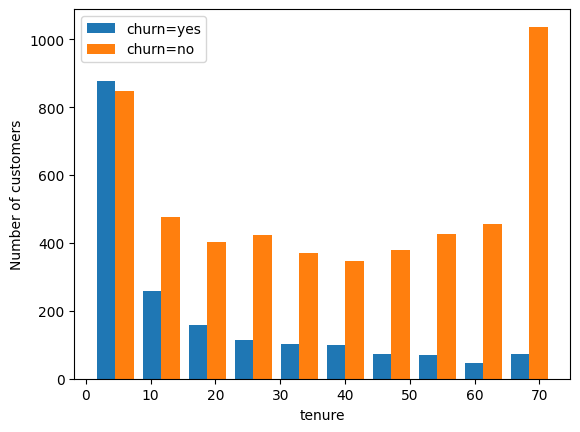

In [37]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.hist([tenure_churn_yes,tenure_churn_no],label=['churn=yes','churn=no'])
plt.legend()

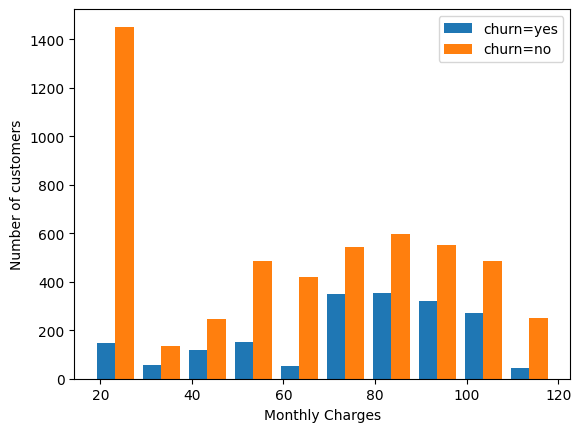

In [38]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges	
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges	
plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.hist([mc_churn_yes,mc_churn_no],label=['churn=yes','churn=no'])
plt.legend()

In [39]:
def uniq_val(df) :
    for column in df :
        if df[column].dtypes == 'object' :
            print(f'{column} : {df[column].unique()}')

In [40]:
uniq_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [41]:
df1.replace('No internet service', 'No', inplace =True)
df1.replace('No phone service', 'No', inplace =True)

C:\Users\jaich\AppData\Local\Temp\ipykernel_7508\3359187307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace =True)
C:\Users\jaich\AppData\Local\Temp\ipykernel_7508\3359187307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace =True)


In [42]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col :
    df1[col].replace({'Yes' : 1,'No' : 0},inplace =True)

C:\Users\jaich\AppData\Local\Temp\ipykernel_7508\1000534957.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes' : 1,'No' : 0},inplace =True)
C:\Users\jaich\AppData\Local\Temp\ipykernel_7508\1000534957.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes'

In [43]:
df1['gender'].replace({'Male' : 1,'Female':0},inplace = True)


C:\Users\jaich\AppData\Local\Temp\ipykernel_7508\3700003118.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male' : 1,'Female':0},inplace = True)
C:\Users\jaich\AppData\Local\Temp\ipykernel_7508\3700003118.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].

In [44]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False


In [56]:
for column in df2 :
    print(f'{column} : {df2[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_0 : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [54]:
bool_cols = ['InternetService_0', 'InternetService_DSL', 'InternetService_Fiber optic', 
             'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
             'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
             'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Convert boolean columns to integers with values 1 and 0
for col in bool_cols:
    df2[col] = df2[col].astype(int)

In [57]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            int32
InternetService_DSL                          int32
InternetService_Fiber optic    

In [60]:
col_to_scale = ['tenure', 'MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [62]:
x = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=5)

In [76]:
import tensorflow as tf
from tensorflow import keras 

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation = 'relu'),
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
              loss= 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 1000)

Epoch 1/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7038 - loss: 0.6007
Epoch 2/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7975 - loss: 0.4317
Epoch 3/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.4259
Epoch 4/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8005 - loss: 0.4149
Epoch 5/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7977 - loss: 0.4242
Epoch 6/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8034 - loss: 0.4176
Epoch 7/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7987 - loss: 0.4127
Epoch 8/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.4155
Epoch 9/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8210 - loss: 0.3906
Epoch 10/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.8073 - loss: 0.4147
Epoch 11/1000
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.8063 - loss: 0.4188
Epoch 12/1000
176/176 ━━━━

In [77]:
model.evaluate(x_test,y_test)  

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.7368 - loss: 1.4579


[1.4258440732955933, 0.7277896404266357]

In [78]:
yp =model.predict(x_test)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [80]:
y_pred = []
for element in yp :
    if element>0.5:
        y_pred.append(1)
    else :
        y_pred.append(0)

In [81]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [82]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       999
           1       0.54      0.47      0.50       408

    accuracy                           0.73      1407
   macro avg       0.66      0.65      0.66      1407
weighted avg       0.72      0.73      0.72      1407



Text(95.72222222222221, 0.5, 'Truth')

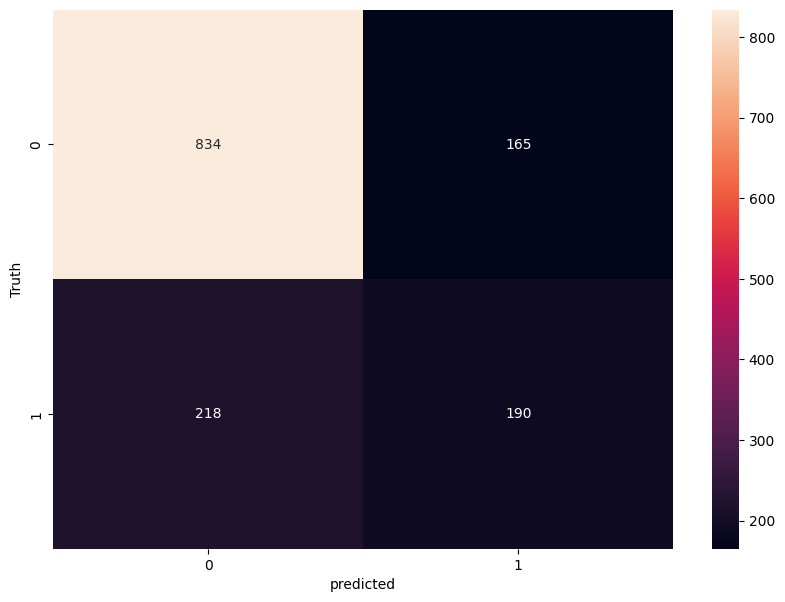

In [86]:
import seaborn as sn 
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

0.7277896233120114